In [1]:
import time

from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData
from GeneticOperators import twors_mutation, centre_inverse_mutation, ordered_crossover, reverse_sequence_mutation, roulette_selection, tournament_selection_with_pool_size, compute_total_route_length, rank_based_selection
import matplotlib.pyplot as plt

### Part 1: The Travelling Robot Problem

In generation 1...
Best solution in generation 1 is the chromosome [0, 4, 10, 16, 7, 17, 13, 14, 12, 1, 6, 9, 3, 15, 8, 5, 11, 2] with a fitness ratio of 0.00026574541589157585 and distance of 3763

In generation 2...
Best solution in generation 2 is the chromosome [0, 4, 6, 8, 14, 7, 12, 10, 16, 17, 13, 1, 9, 3, 15, 5, 11, 2] with a fitness ratio of 0.0003051571559353067 and distance of 3277

In generation 3...
Best solution in generation 3 is the chromosome [0, 4, 15, 3, 6, 8, 14, 7, 12, 13, 1, 9, 16, 10, 5, 2, 11, 17] with a fitness ratio of 0.00031259768677711783 and distance of 3199

In generation 4...
Best solution in generation 4 is the chromosome [0, 4, 1, 6, 3, 13, 12, 7, 14, 8, 17, 11, 2, 5, 10, 16, 9, 15] with a fitness ratio of 0.00032948929159802305 and distance of 3035

In generation 5...
Best solution in generation 5 is the chromosome [0, 4, 10, 16, 7, 17, 13, 1, 6, 15, 3, 9, 8, 5, 11, 12, 14, 2] with a fitness ratio of 0.00034048348655090226 and distance of 2937

In gen

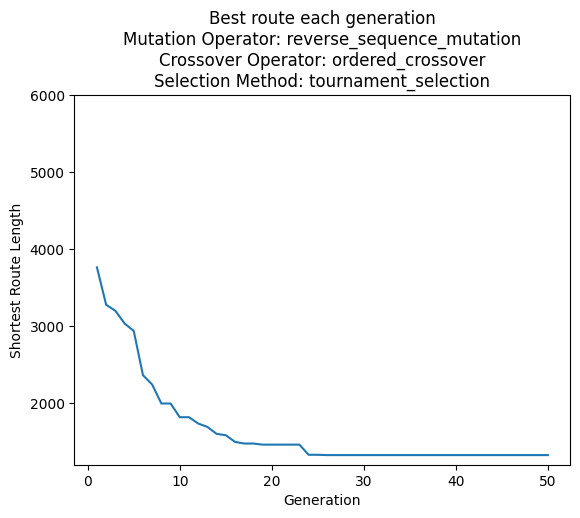

[0, 1, 6, 4, 13, 15, 3, 8, 17, 7, 9, 14, 11, 12, 5, 10, 2, 16]


In [28]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 200
generations = 50
mutation_probability = 0.5
crossover_probability = 0.7
persist_file = "./../data/optimal_tsp"
crossover_operator = ordered_crossover
mutation_operator = reverse_sequence_mutation
pool_size = 3 # Used when we use tournament selection
selection_method = tournament_selection_with_pool_size(pool_size)
# selection_method = rank_based_selection
elitism = 50 # Keep this an even number otherwise the population of next gen might change because we produce 2 offsprings at a time

# Setup optimization
tsp_data = TSPData.read_from_file(persist_file)
ga = GeneticAlgorithm(generations, population_size, crossover_operator, mutation_operator, selection_method, mutation_probability, crossover_probability, elitism=elitism)

# Run optimization and write to file
solution = ga.solve_tsp(tsp_data)
print(solution)
tsp_data.write_action_file(solution, "./../data/tsp_solution.txt")

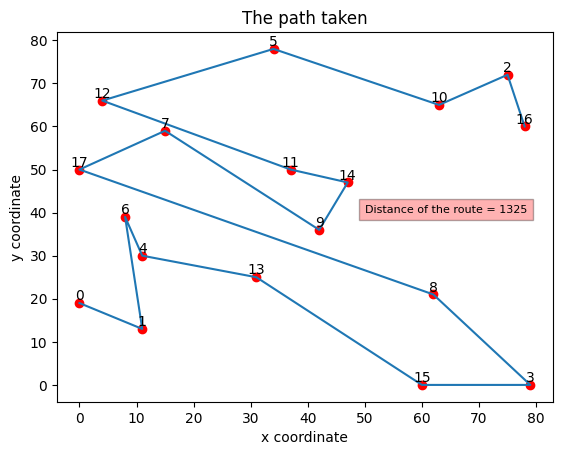

Distance of the above route:  1325


In [29]:
# Plot the route

route  = solution
route_distance = compute_total_route_length(tsp_data, route)
prod_loc = list(map(lambda c: (c.x, c.y), tsp_data.product_locations))
sorted_prod_loc = [prod_loc[i] for i in route]

prod_loc_x = list(map(lambda c: c[0], sorted_prod_loc))
prod_loc_y = list(map(lambda c: c[1], sorted_prod_loc))

plt.plot(prod_loc_x, prod_loc_y, 'ro')
plt.plot(prod_loc_x, prod_loc_y)

for idx, (xi, yi) in enumerate(sorted_prod_loc):
    # I add 1 to the route[idx] here because the products are indexed from 1 and not 0
    plt.text(xi, yi, route[idx], va='bottom', ha='center')
plt.title("The path taken")
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.text(50, 40, 'Distance of the route = {}'.format(route_distance), fontsize = 8,
         bbox = dict(facecolor = 'red', alpha = 0.3))
plt.show()
print("Distance of the above route: ", route_distance)

### Part 2: Path Finding Through Ant Colony Optimization

Ready reading maze file ./../data/hard_maze.txt
Releasing generation 1
Releasing Ant: 0
Releasing Ant: 1
Releasing Ant: 2
Releasing Ant: 3
Releasing Ant: 4
Releasing Ant: 5
Releasing Ant: 6
Releasing Ant: 7
Releasing Ant: 8
Releasing Ant: 9
Releasing Ant: 10
Releasing Ant: 11
Releasing Ant: 12
Releasing Ant: 13
Releasing Ant: 14
Releasing Ant: 15
Releasing Ant: 16
Releasing Ant: 17
Releasing Ant: 18
Releasing Ant: 19
Releasing Ant: 20
Releasing Ant: 21
The ant found the end location
Releasing Ant: 22
Releasing Ant: 23
Releasing Ant: 24
Releasing Ant: 25
Releasing Ant: 26
Releasing Ant: 27
Releasing Ant: 28
Releasing Ant: 29
Releasing Ant: 30
Releasing Ant: 31
Releasing Ant: 32
Releasing Ant: 33
Releasing Ant: 34
Releasing Ant: 35
Releasing Ant: 36
Releasing Ant: 37
Releasing Ant: 38
Releasing Ant: 39
Releasing Ant: 40
Releasing Ant: 41
Releasing Ant: 42
Releasing Ant: 43
Releasing Ant: 44
Releasing Ant: 45
Releasing Ant: 46
Releasing Ant: 47
Releasing Ant: 48
Releasing Ant: 49
Releasin

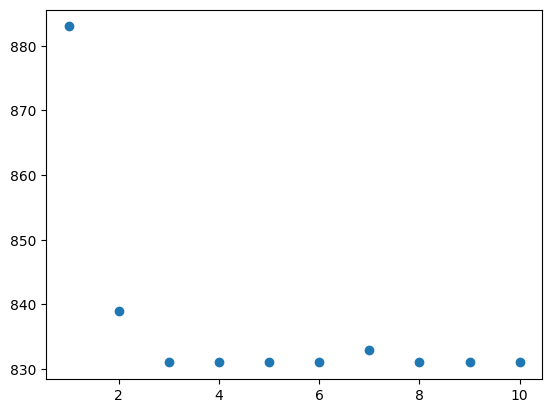

In [4]:
# Please keep your parameters for the ACO easily changeable here
# Hard Maze
gen = 500        # ants per generation
no_gen = 10    # number of generations
Q = 1600        # normalization factor for the amount of dropped pheromone
evap = 0.3      # evaporation factor
e = 50           # elitism constant
alpha = 1       # trail
beta = 1        # visibility
convergence_length = 20 # route length at which we may stop searching for the shortest route
max_step = 10000
max_step_once_found = 10000

# Construct the optimization objects
maze = Maze.create_maze("./../data/hard_maze.txt")
spec = PathSpecification.read_coordinates("./../data/hard_coordinates.txt")
aco = AntColonyOptimization(maze, gen, no_gen, Q, e, evap, alpha, beta, convergence_length, max_step, max_step_once_found)

# Save starting time
start_time = int(round(time.time() * 1000))

# Run optimization
shortest_route, shortest_each_gen = aco.find_shortest_route(spec)

# Print time taken
print("\nTime taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

plt.scatter(list(range(1, no_gen+1)), shortest_each_gen)
plt.show()

Ready reading maze file ./../data/medium_maze.txt
Releasing generation 1
Releasing Ant: 0
Releasing Ant: 1
The ant found the end location
Releasing Ant: 2
Releasing Ant: 3
Releasing Ant: 4
The ant found the end location
Releasing Ant: 5
The ant found the end location
Releasing Ant: 6
Releasing Ant: 7
Releasing Ant: 8
The ant found the end location
Releasing Ant: 9
The ant found the end location
Releasing Ant: 10
The ant found the end location
Releasing Ant: 11
Releasing Ant: 12
The ant found the end location
Releasing Ant: 13
Releasing Ant: 14
Releasing Ant: 15
The ant found the end location
Releasing Ant: 16
Releasing Ant: 17
The ant found the end location
Releasing Ant: 18
Releasing Ant: 19
The ant found the end location
Releasing Ant: 20
The ant found the end location
Releasing Ant: 21
Releasing Ant: 22
Releasing Ant: 23
The ant found the end location
Releasing Ant: 24
The ant found the end location
Releasing Ant: 25
The ant found the end location
Releasing Ant: 26
Releasing Ant: 27

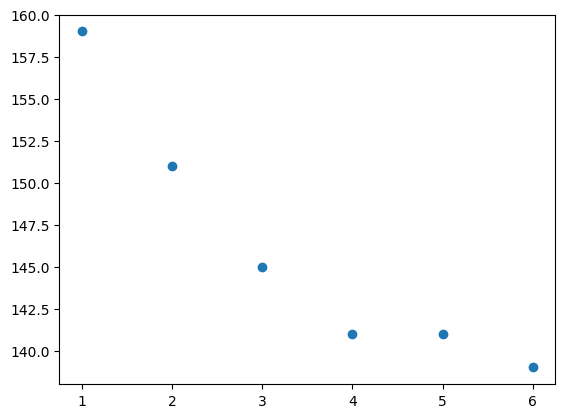

In [2]:
# Please keep your parameters for the ACO easily changeable here
# Medium maze
gen = 100        # ants per generation
no_gen = 6    # number of generations
Q = 1600        # normalization factor for the amount of dropped pheromone
evap = 0.1      # evaporation factor
e = 10           # elitism constant
alpha = 1       # trail
beta = 1        # visibility
convergence_length = 20 # route length at which we may stop searching for the shortest route
max_step = 10000
max_step_once_found = 10000

# Construct the optimization objects
maze = Maze.create_maze("./../data/medium_maze.txt")
spec = PathSpecification.read_coordinates("./../data/medium_coordinates.txt")
aco = AntColonyOptimization(maze, gen, no_gen, Q, e, evap, alpha, beta, convergence_length, max_step, max_step_once_found)

# Save starting time
start_time = int(round(time.time() * 1000))

# Run optimization
shortest_route, shortest_each_gen = aco.find_shortest_route(spec)

# Print time taken
print("\nTime taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
shortest_route.write_to_file("./../data/medium_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

plt.scatter(list(range(1, no_gen+1)), shortest_each_gen)
plt.show()

Ready reading maze file ./../data/easy_maze.txt
Releasing generation 1
Releasing Ant: 0
The ant found the end location
Releasing Ant: 1
The ant found the end location
Releasing Ant: 2
The ant found the end location
Releasing Ant: 3
The ant found the end location
Releasing Ant: 4
The ant found the end location
Releasing Ant: 5
The ant found the end location
Releasing Ant: 6
The ant found the end location
Releasing Ant: 7
The ant found the end location
Releasing Ant: 8
The ant found the end location
Releasing Ant: 9
The ant found the end location
Releasing Ant: 10
The ant found the end location
Releasing Ant: 11
The ant found the end location
Releasing Ant: 12
The ant found the end location
Releasing Ant: 13
The ant found the end location
Releasing Ant: 14
The ant found the end location
Releasing Ant: 15
The ant found the end location
Releasing Ant: 16
The ant found the end location
Releasing Ant: 17
The ant found the end location
Releasing Ant: 18
The ant found the end location
Releasin

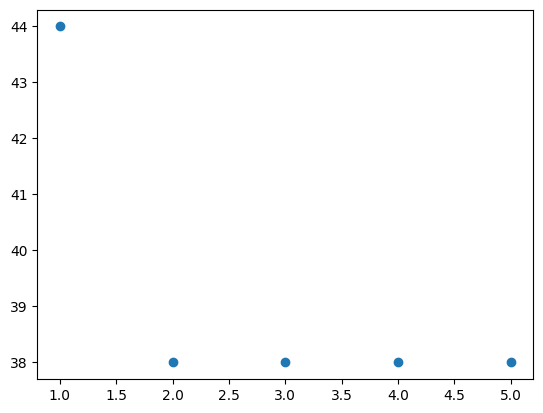

In [3]:
# Please keep your parameters for the ACO easily changeable here
# Easy Maze
gen = 50        # ants per generation
no_gen = 5    # number of generations
Q = 160        # normalization factor for the amount of dropped pheromone
evap = 0.1      # evaporation factor
e = 5           # elitism constant
alpha = 1       # trail
beta = 1        # visibility
convergence_length = 20 # route length at which we may stop searching for the shortest route
max_step = 10000
max_step_once_found = 10000

# Construct the optimization objects
maze = Maze.create_maze("./../data/easy_maze.txt")
spec = PathSpecification.read_coordinates("./../data/easy_coordinates.txt")
aco = AntColonyOptimization(maze, gen, no_gen, Q, e, evap, alpha, beta, convergence_length, max_step, max_step_once_found)

# Save starting time
start_time = int(round(time.time() * 1000))

# Run optimization
shortest_route, shortest_each_gen = aco.find_shortest_route(spec)

# Print time taken
print("\nTime taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
shortest_route.write_to_file("./../data/easy_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

plt.scatter(list(range(1, no_gen+1)), shortest_each_gen)
plt.show()

### Synthesis

In [2]:
# Set up ACO parameters
gen = 1         # ants per generation
no_gen = 1      # number of generations
Q = 1600        # normalization factor for the amount of dropped pheromone
e = 50          # Elitism constant
evap = 0.1      # evaporation factor
alpha = 1       # trail
beta = 1        # visibility
convergence_length = 20 # route length at which we may stop searching for the shortest route
max_step = 10
max_step_once_found = 10

persist_file = "./../data/my_tsp"
tsp_path = "./../data/tsp_products.txt"
coordinates = "./../data/hard_coordinates.txt"

# Construct optimization
maze = Maze.create_maze("./../data/hard_maze.txt")
tsp_data = TSPData.read_specification(coordinates, tsp_path)
aco = AntColonyOptimization(maze, gen, no_gen, Q, e, evap, alpha, beta, convergence_length, max_step, max_step_once_found)

# Run optimization and write to file
tsp_data.calculate_routes(aco)
tsp_data.write_to_file(persist_file)

Ready reading maze file ./../data/hard_maze.txt

 Products 0 0 

Releasing generation 1
Releasing Ant: 0

 Products 0 1 

Releasing generation 1
Releasing Ant: 0

 Products 0 2 

Releasing generation 1
Releasing Ant: 0

 Products 0 3 

Releasing generation 1
Releasing Ant: 0

 Products 0 4 

Releasing generation 1
Releasing Ant: 0

 Products 0 5 

Releasing generation 1
Releasing Ant: 0

 Products 0 6 

Releasing generation 1
Releasing Ant: 0

 Products 0 7 

Releasing generation 1
Releasing Ant: 0

 Products 0 8 

Releasing generation 1
Releasing Ant: 0

 Products 0 9 

Releasing generation 1
Releasing Ant: 0

 Products 0 10 

Releasing generation 1
Releasing Ant: 0

 Products 0 11 

Releasing generation 1
Releasing Ant: 0

 Products 0 12 

Releasing generation 1
Releasing Ant: 0

 Products 0 13 

Releasing generation 1
Releasing Ant: 0

 Products 0 14 

Releasing generation 1
Releasing Ant: 0

 Products 0 15 

Releasing generation 1
Releasing Ant: 0

 Products 0 16 

Releasing genera

In generation 1...
Best solution in generation 1 is the chromosome [0, 12, 1, 11, 2, 13, 4, 14, 10, 7, 3, 17, 8, 9, 5, 15, 6, 16] with a fitness ratio of 0.00033500837520938025 and distance of 4759

In generation 2...
Best solution in generation 2 is the chromosome [1, 9, 13, 15, 4, 0, 6, 3, 11, 16, 14, 7, 8, 17, 5, 12, 10, 2] with a fitness ratio of 0.00033500837520938025 and distance of 2985

In generation 3...
Best solution in generation 3 is the chromosome [1, 9, 13, 15, 4, 0, 6, 3, 11, 16, 14, 7, 8, 17, 5, 12, 10, 2] with a fitness ratio of 0.00033500837520938025 and distance of 2985

In generation 4...
Best solution in generation 4 is the chromosome [1, 9, 13, 15, 4, 0, 6, 3, 11, 16, 14, 7, 8, 17, 5, 12, 10, 2] with a fitness ratio of 0.00033500837520938025 and distance of 2985

In generation 5...
Best solution in generation 5 is the chromosome [14, 1, 5, 16, 6, 7, 17, 2, 3, 8, 10, 4, 12, 13, 11, 9, 15, 0] with a fitness ratio of 0.0003454231433506045 and distance of 6237

In gen

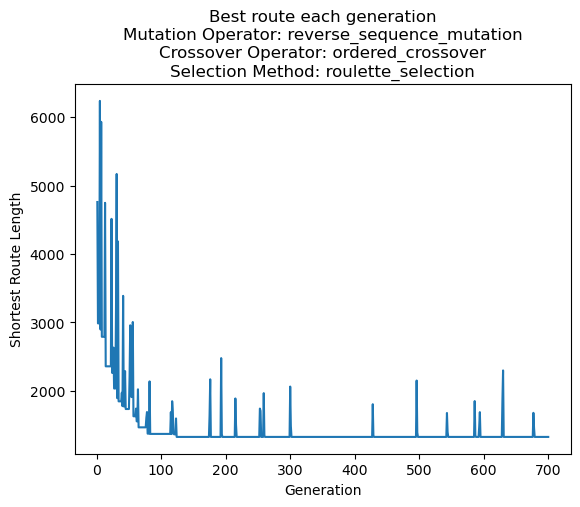

In [3]:
# Set up TSP parameters
population_size = 200
generations = 700
mutation_probability = 0.05
crossover_probability = 0.7
persist_file = "./../data/my_tsp"
crossover_operator = ordered_crossover
mutation_operator = reverse_sequence_mutation
pool_size = 20 # Used when we use tournament selection
# selection_method = tournament_selection_with_pool_size(pool_size)
selection_method = roulette_selection
elitism = 1

# Read from file and print
tsp_data2 = TSPData.read_from_file(persist_file)

# Solve TSP using your own paths file
ga = GeneticAlgorithm(generations, population_size, crossover_operator, mutation_operator, selection_method, mutation_probability, crossover_probability, elitism=elitism)
solution = ga.solve_tsp(tsp_data2)
tsp_data2.write_action_file(solution, "./../data/tsp_solution.txt")